In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor 

In [2]:
df = pd.read_csv("F:\Ruthvik.Training\Vizu\Instagram data.csv", encoding='latin1')
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [3]:
# check how many null values

df.isnull().sum()

# if null exists
# df = df.dropna()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [5]:
df.shape

(119, 13)

C:\Users\Ruthvik\AppData\Local\Temp\ipykernel_11316\1928549485.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['From Home'])


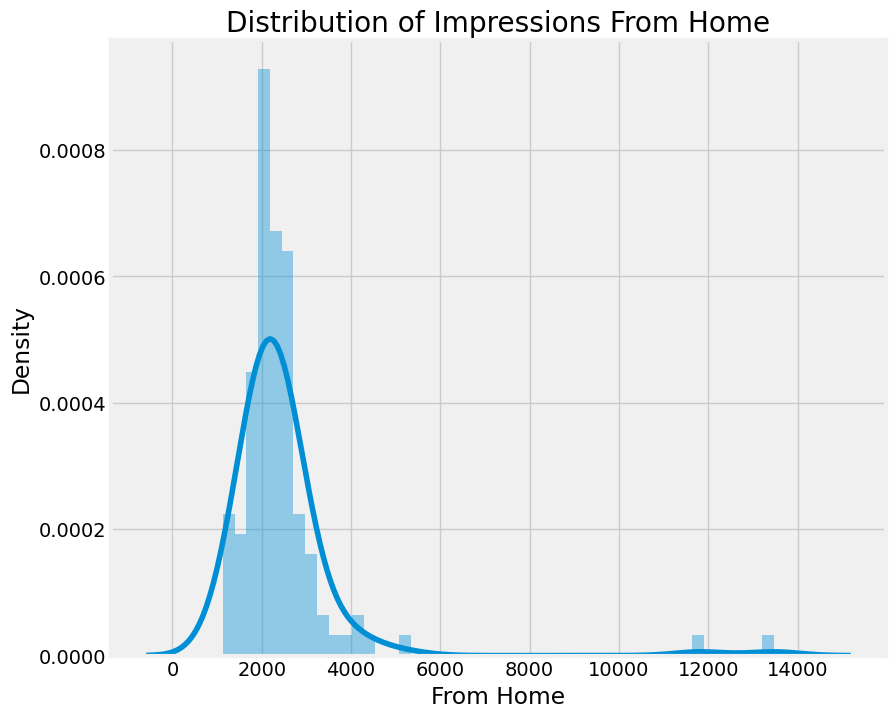

In [6]:
# Distribution of Impressions from home

plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(df['From Home'])
plt.show()

C:\Users\Ruthvik\AppData\Local\Temp\ipykernel_11316\588452297.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['From Hashtags'])


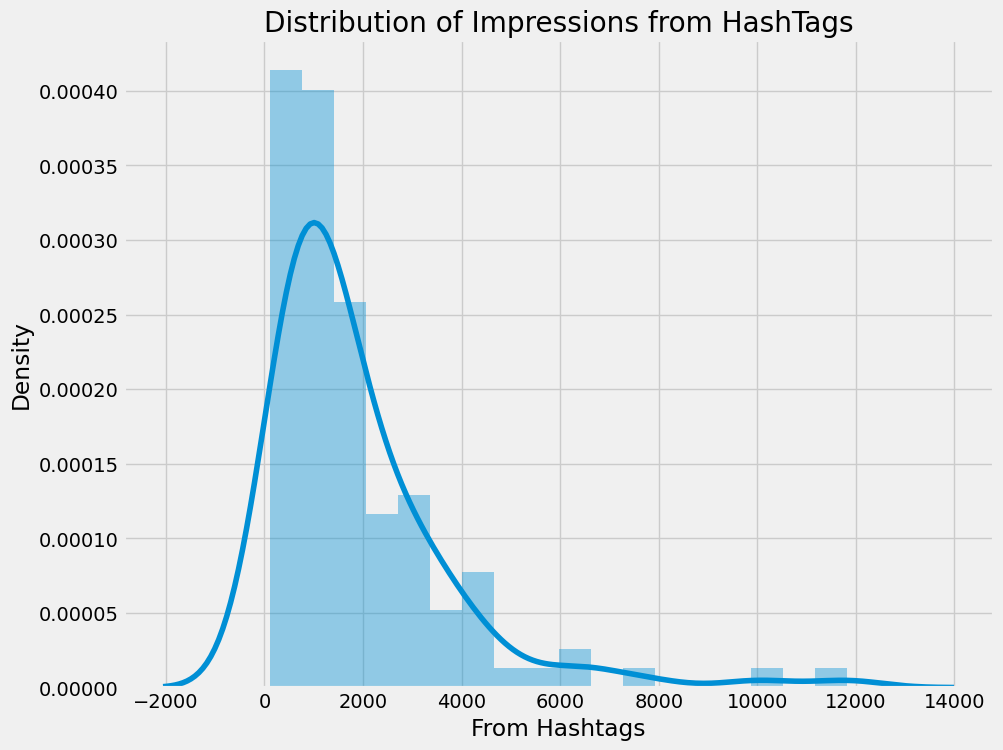

In [7]:
# Distribution of Impressions from HashTags

plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions from HashTags")
sns.distplot(df['From Hashtags'])
plt.show()

C:\Users\Ruthvik\AppData\Local\Temp\ipykernel_11316\2015893817.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['From Explore'])


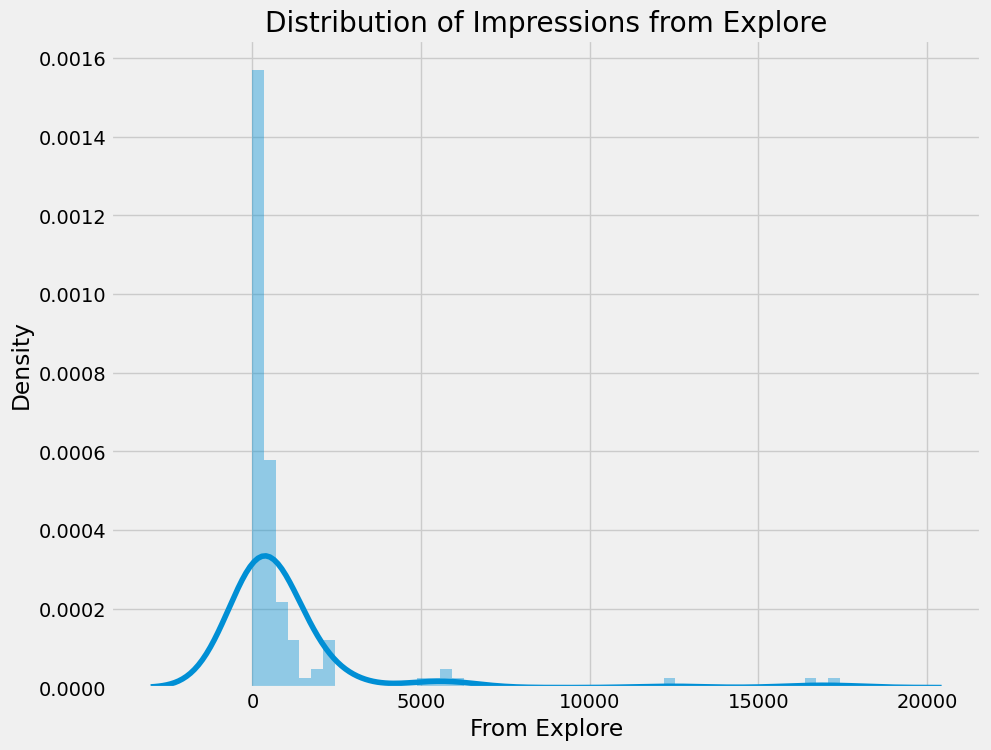

In [8]:
# Distribution from Explore

plt.figure(figsize=(10,8))
plt.title("Distribution of Impressions from Explore")
sns.distplot(df['From Explore'])
plt.show()

In [9]:
# Percentage of Impressions from various sources on Insta

home = df['From Home'].sum()
hashtags = df['From Hashtags'].sum()
explore = df['From Explore'].sum()
other = df['From Other'].sum()

labels = ['From Home','From Hashtags','From Explore','From Other' ]
values = [home,hashtags,explore,other]

fig = px.pie(df,values=values,names=labels,title='Percentage from different Sources',hole=0.6)

fig.show()

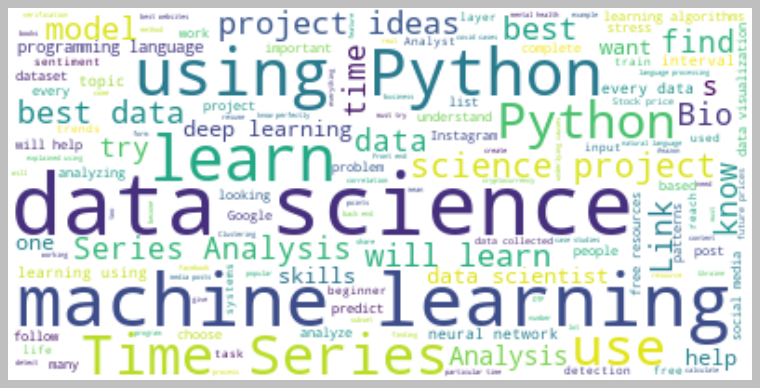

In [10]:
# Analyze Content

# analyze data from hashtags and comment/captions

# Create Wordcloud of caption column  for most repeated word

text = " ".join(i for i in df.Caption)
stopwords =  set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

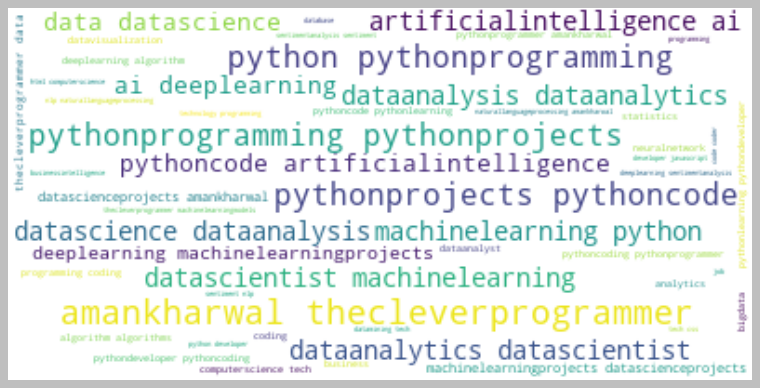

In [11]:
# Create wordcloud for Hashtags


text = " ".join(i for i in df.Hashtags)
stopwords =  set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color="white").generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
# Analyzing relationship

# Relation btwn Impressions and Likes

fig = px.scatter(data_frame= df, x="Impressions", y="Likes", size ="Likes", trendline="ols",
                 title=" Relationship B/w Likes & Impressions")
fig.show()

In [13]:
# Relation Btw Comment and Impression

fig = px.scatter(data_frame= df, x="Impressions", y="Comments", size ="Comments", trendline="ols",
                 title=" Relationship B/w Comments & Impressions")
fig.show()

In [14]:
# Relation b/w Shares
fig = px.scatter(data_frame= df, x="Impressions", y="Shares", size ="Shares", trendline="ols",
                 title=" Relationship B/w Shares & Impressions")
fig.show()

In [15]:
corr = df.corr()
corr['Impressions'].sort_values(ascending=False)

C:\Users\Ruthvik\AppData\Local\Temp\ipykernel_11316\1399595657.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

In [17]:
# Conversion Rate

# (Follows/ProfileVisits)*100

conv_rate = (df['Follows'].sum() / df['Profile Visits'].sum())*100
conv_rate

41.00265604249668

In [18]:
# Relation b/w follows and profile visits

fig = px.scatter(data_frame=df,x='Profile Visits',y='Follows',size="Follows",
                 trendline="ols",title="Relation b/w Profile and Follows")

fig.show()

In [20]:
# Prediction Model

x = np.array(df[['Likes','Saves','Comments','Shares','Profile Visits','Follows']])

y = np.array(df['Impressions'])

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)


In [21]:
model= PassiveAggressiveRegressor()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8939284004467939

In [22]:
# Predict

# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]

features = [[282.0,233.0,4.0,9.0,165.0,54.0]]

model.predict(features)

array([12083.35410182])